In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Importing necessary libraries for data manipulation, visualization, and machine learning.

# pandas: Provides data structures and data analysis tools.
import pandas as pd

# numpy: Provides support for working with arrays and mathematical functions on arrays.
import numpy as np

# seaborn: Data visualization library based on matplotlib. 
import seaborn as sns

# matplotlib: A plotting library to produce visualizations.
import matplotlib.pyplot as plt

# StandardScaler: A utility from scikit-learn to standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler

# mean_squared_error: A metric from scikit-learn to evaluate regression model performance.
from sklearn.metrics import mean_squared_error

# LinearRegression: Linear regression model from scikit-learn.
from sklearn.linear_model import LinearRegression

# DecisionTreeRegressor: Regression model using decision trees from scikit-learn.
from sklearn.tree import DecisionTreeRegressor

# RandomForestRegressor: Regression model using an ensemble of decision trees from scikit-learn.
from sklearn.ensemble import RandomForestRegressor

# SVR: Support Vector Regression model from scikit-learn.
from sklearn.svm import SVR

# KNeighborsRegressor: Regression model using k-nearest neighbors algorithm from scikit-learn.
from sklearn.neighbors import KNeighborsRegressor

# train_test_split: Utility function from scikit-learn to split datasets into training and test subsets.
# GridSearchCV: Utility function from scikit-learn for hyperparameter tuning.
from sklearn.model_selection import train_test_split, GridSearchCV

# xgboost: An optimized gradient boosting library.
import xgboost as xgb

#sklearns train test split and preprocessing
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [2]:
#Read in CSV
df_algae = pd.read_csv('algae1.csv')
df_algae = df_algae.iloc[:, 1:]
df_algae

,season,size,speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
0,winter,small,medium,8.00,9.8,60.800,6.238,578.00000,105.000,170.00000,50.000,0.0,0.0,0.0,0.0,34.2,8.3,0.0
1,spring,small,medium,8.35,8.0,57.750,1.288,370.00000,428.750,558.75000,1.300,1.4,7.6,4.8,1.9,6.7,0.0,2.1
2,autumn,small,medium,8.10,11.4,40.020,5.330,346.66699,125.667,187.05701,15.600,3.3,53.6,1.9,0.0,0.0,0.0,9.7
3,spring,small,medium,8.07,4.8,77.364,2.302,98.18200,61.182,138.70000,1.400,3.1,41.0,18.9,0.0,1.4,0.0,1.4
4,autumn,small,medium,8.06,9.0,55.350,10.416,233.70000,58.222,97.58000,10.500,9.2,2.9,7.5,0.0,7.5,4.1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,autumn,large,medium,8.40,8.4,17.375,3.833,83.75000,53.625,79.75000,2.338,12.7,21.7,5.6,0.0,1.0,0.0,0.0
196,spring,large,medium,8.30,10.6,14.320,3.200,125.33300,35.333,75.90400,4.667,18.0,7.0,1.7,0.0,4.8,10.3,1.0
197,autumn,large,medium,8.20,7.0,139.989,2.978,60.11000,78.333,140.22000,31.738,0.0,15.9,2.4,1.0,0.0,0.0,0.0
198,winter,large,medium,8.00,7.6,NaN,NaN,NaN,NaN,NaN,NaN,0.0,12.5,3.7,1.0,0.0,0.0,4.9


In [3]:
from sklearn.preprocessing import minmax_scale
algae_a1 = df_algae.iloc[:, 0:18].reindex() # removes the index there is an easier way but can't remember at the moment
algae_a1 


,season,size,speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
0,winter,small,medium,8.00,9.8,60.800,6.238,578.00000,105.000,170.00000,50.000,0.0,0.0,0.0,0.0,34.2,8.3,0.0
1,spring,small,medium,8.35,8.0,57.750,1.288,370.00000,428.750,558.75000,1.300,1.4,7.6,4.8,1.9,6.7,0.0,2.1
2,autumn,small,medium,8.10,11.4,40.020,5.330,346.66699,125.667,187.05701,15.600,3.3,53.6,1.9,0.0,0.0,0.0,9.7
3,spring,small,medium,8.07,4.8,77.364,2.302,98.18200,61.182,138.70000,1.400,3.1,41.0,18.9,0.0,1.4,0.0,1.4
4,autumn,small,medium,8.06,9.0,55.350,10.416,233.70000,58.222,97.58000,10.500,9.2,2.9,7.5,0.0,7.5,4.1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,autumn,large,medium,8.40,8.4,17.375,3.833,83.75000,53.625,79.75000,2.338,12.7,21.7,5.6,0.0,1.0,0.0,0.0
196,spring,large,medium,8.30,10.6,14.320,3.200,125.33300,35.333,75.90400,4.667,18.0,7.0,1.7,0.0,4.8,10.3,1.0
197,autumn,large,medium,8.20,7.0,139.989,2.978,60.11000,78.333,140.22000,31.738,0.0,15.9,2.4,1.0,0.0,0.0,0.0
198,winter,large,medium,8.00,7.6,NaN,NaN,NaN,NaN,NaN,NaN,0.0,12.5,3.7,1.0,0.0,0.0,4.9


In [4]:
cap=["season","size","speed"]
for i in cap:
    print(i,algae_a1[i].unique())

season ['winter' 'spring' 'autumn' 'summer']
size ['small' 'medium' 'large']
speed ['medium' 'high' 'low']


In [5]:
le=preprocessing.LabelEncoder()
for i in cap:
    algae_a1[i]=le.fit_transform(algae_a1[i])

In [6]:
#Checking for any null values
algae_a1.isnull().sum()

season     0
size       0
speed      0
mxPH       1
mnO2       2
Cl        10
NO3        2
NH4        2
oPO4       2
PO4        2
Chla      12
a1         0
a2         0
a3         0
a4         0
a5         0
a6         0
a7         0
dtype: int64

In [7]:
#drops null values by dropping the rows
#algae_a1.dropna(inplace=True)
#algae_a1

#This is one approach 

#I ended up filling the rows with mean

cap=["mxPH","mnO2","Cl","NO3","NH4","oPO4","PO4","Chla"]
for i in cap:
    algae_a1.fillna(algae_a1[i].mean(),inplace=True)
algae_a1.isnull().sum()

season    0
size      0
speed     0
mxPH      0
mnO2      0
Cl        0
NO3       0
NH4       0
oPO4      0
PO4       0
Chla      0
a1        0
a2        0
a3        0
a4        0
a5        0
a6        0
a7        0
dtype: int64

In [8]:
has_duplicates = algae_a1.duplicated().any()
print(has_duplicates)  # This will print True if there are duplicates and False otherwise.

False


c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

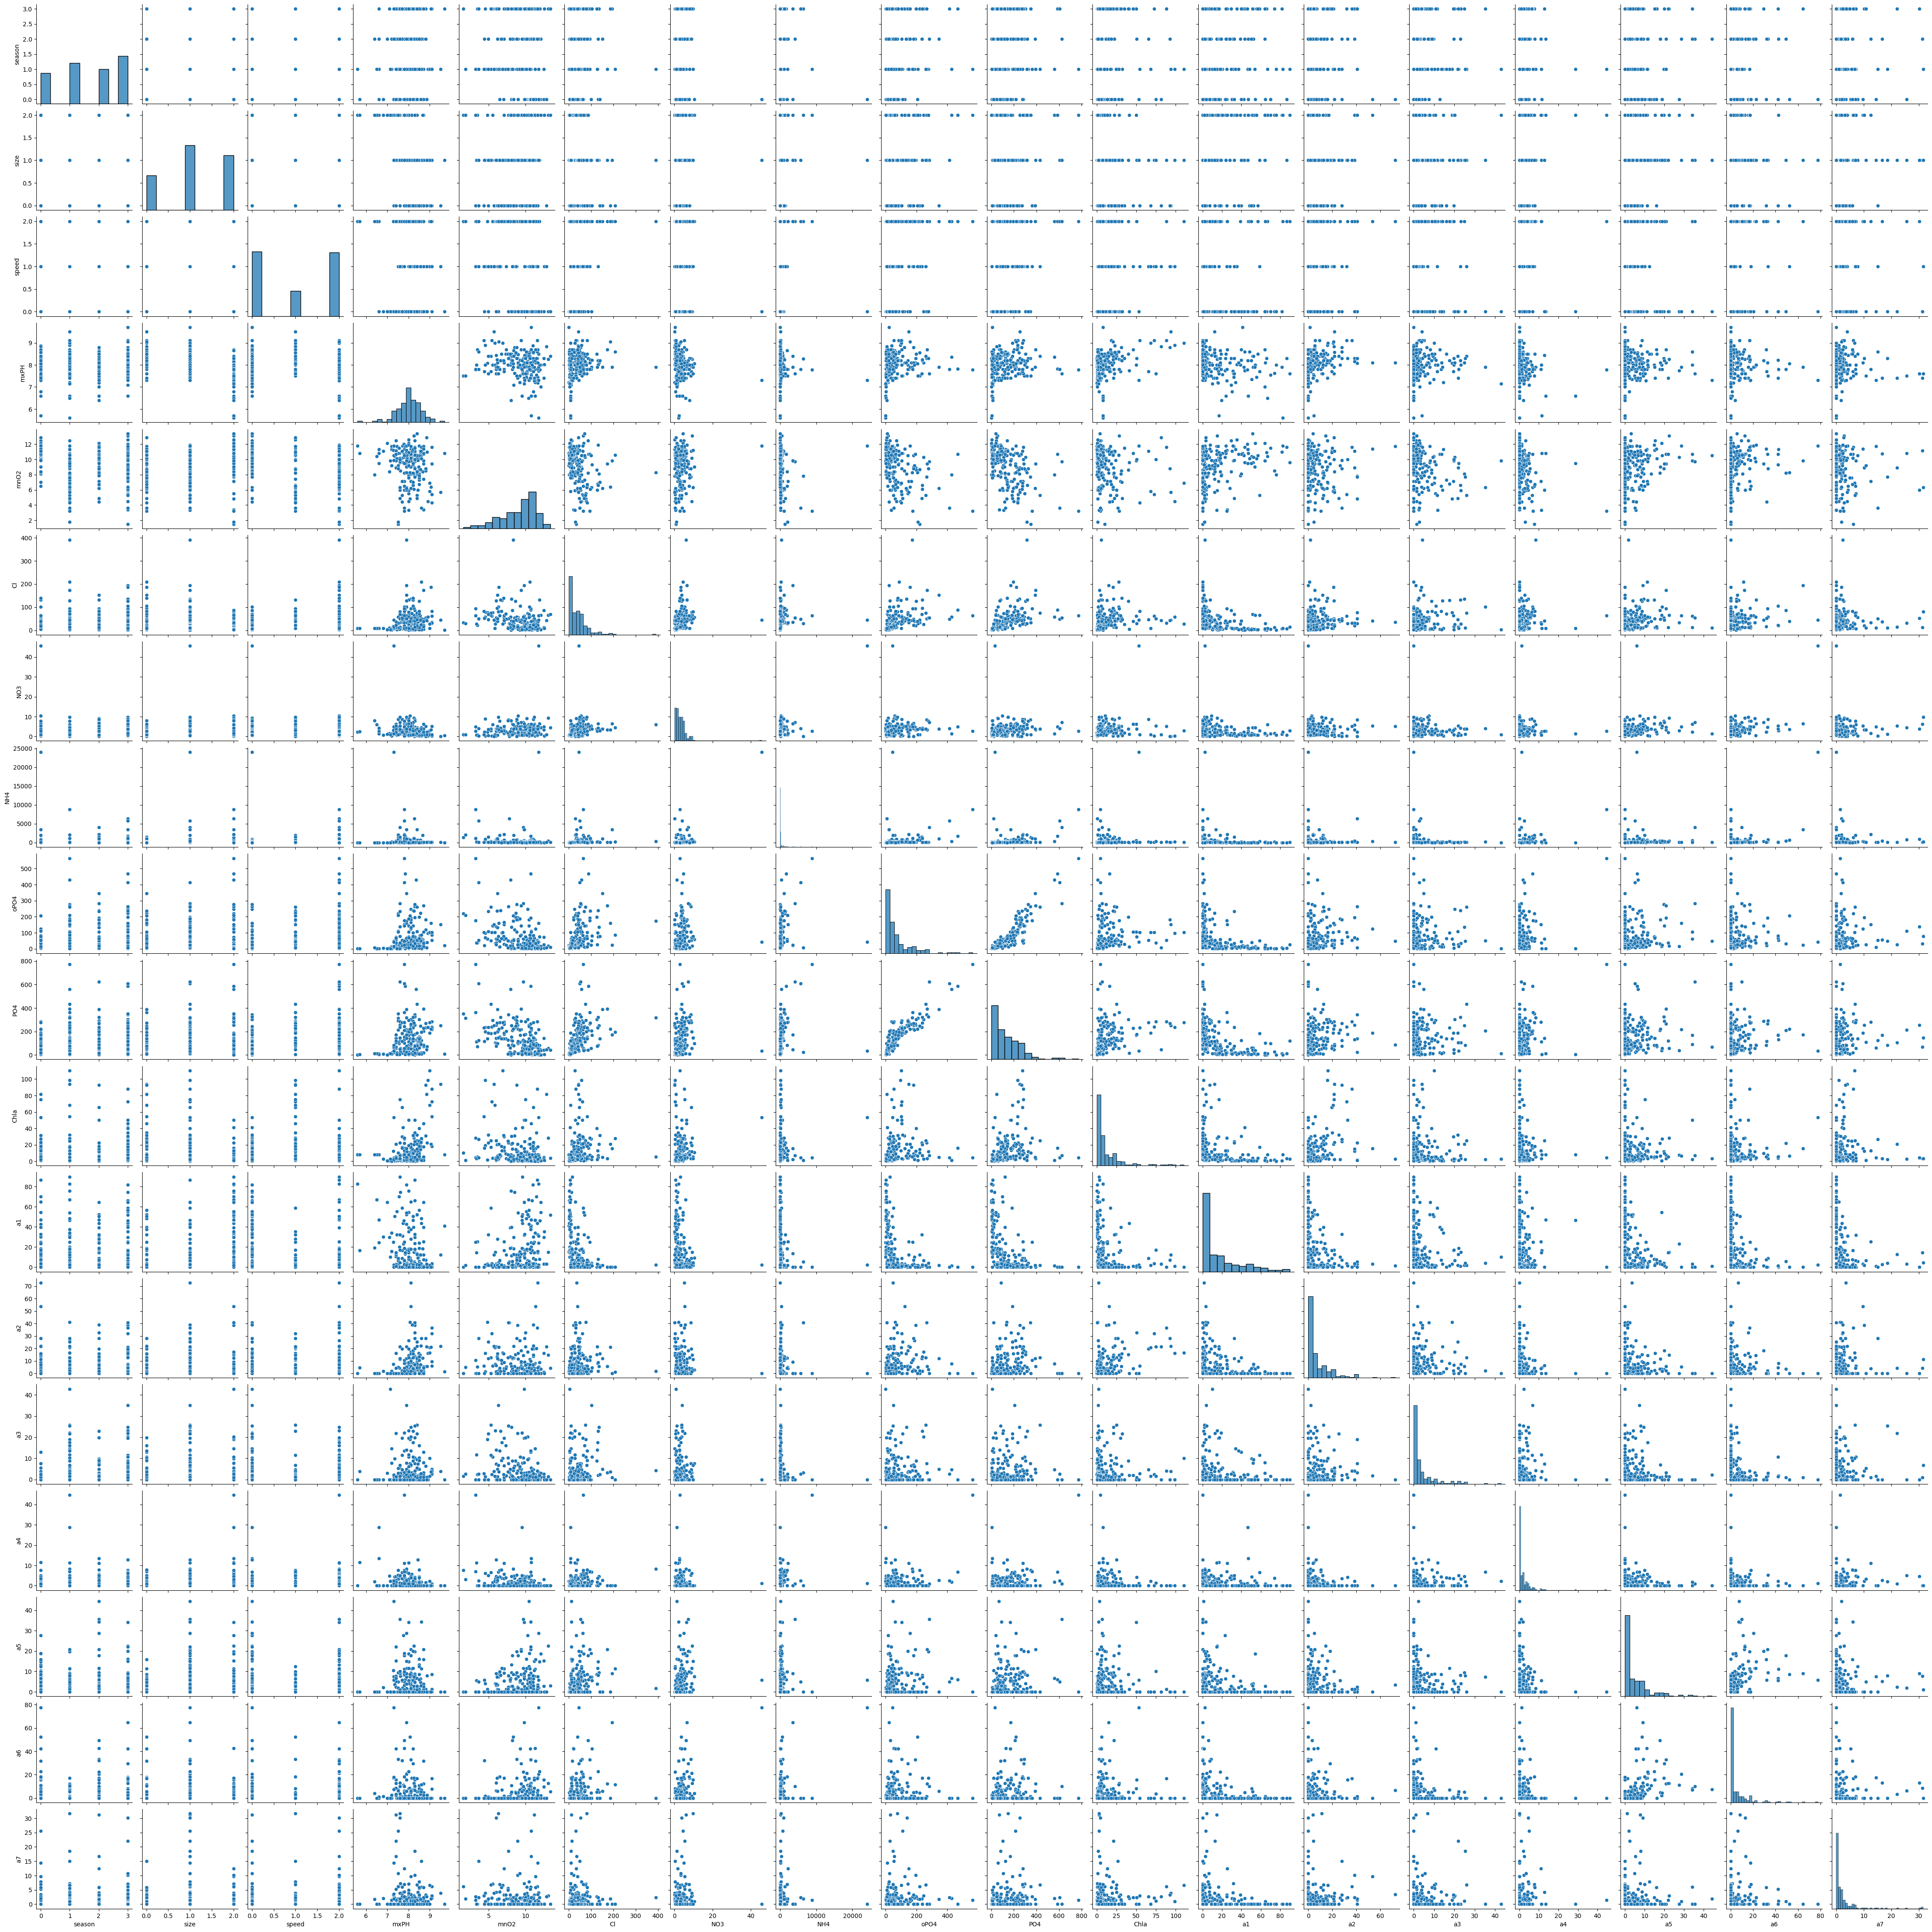

In [9]:
#Using the seaborn Library to create visualizations for EDA
sns.pairplot(algae_a1)

c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


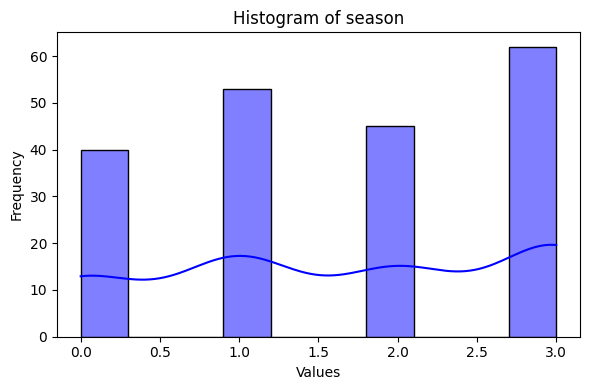

c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


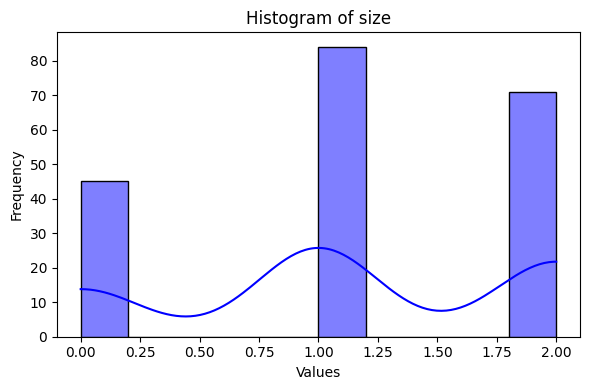

c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


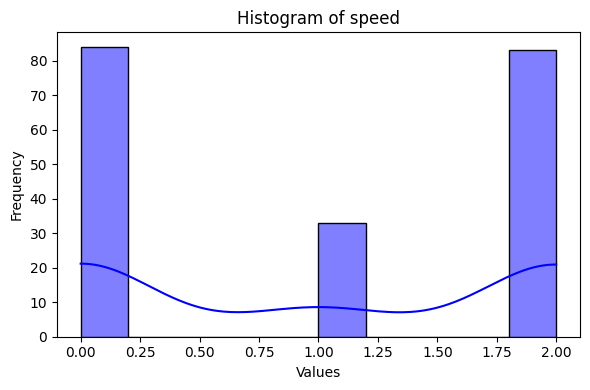

c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


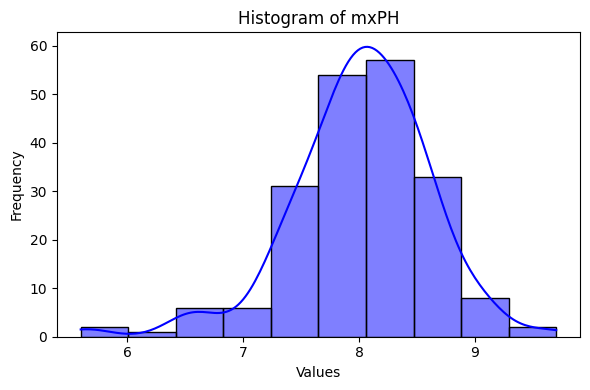

c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


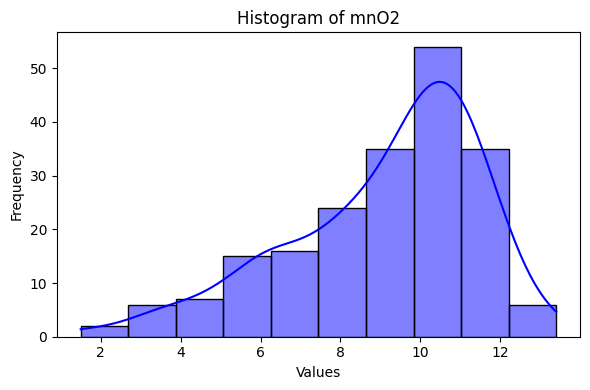

c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


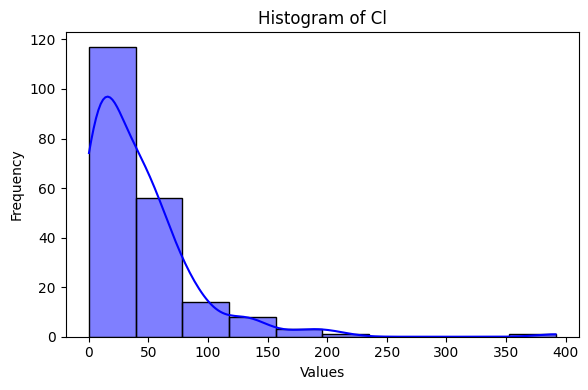

c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


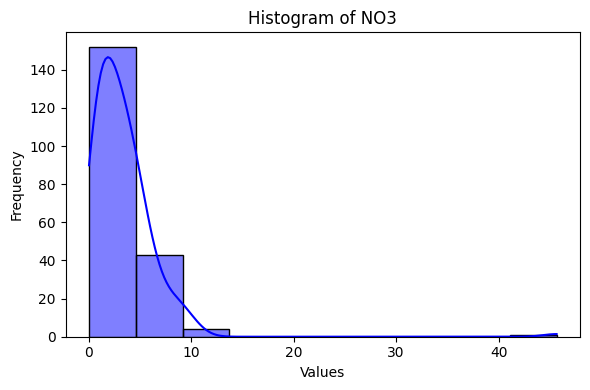

c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


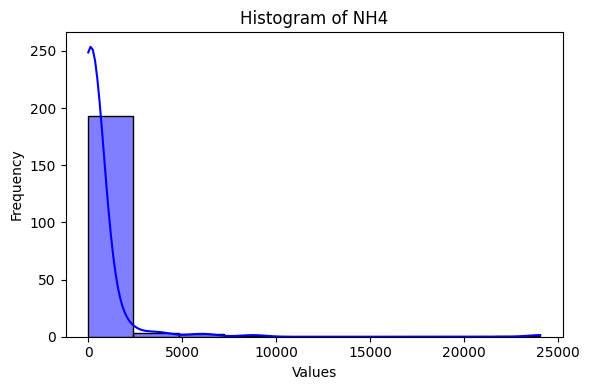

c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


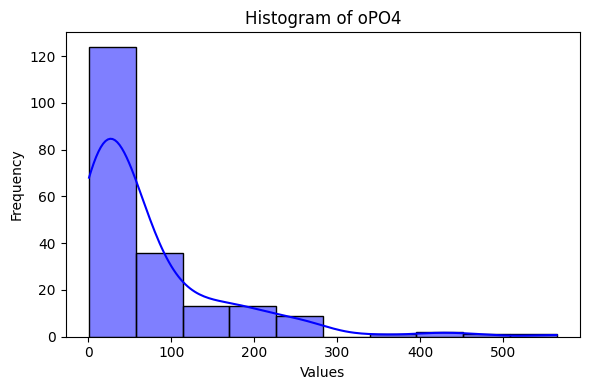

c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


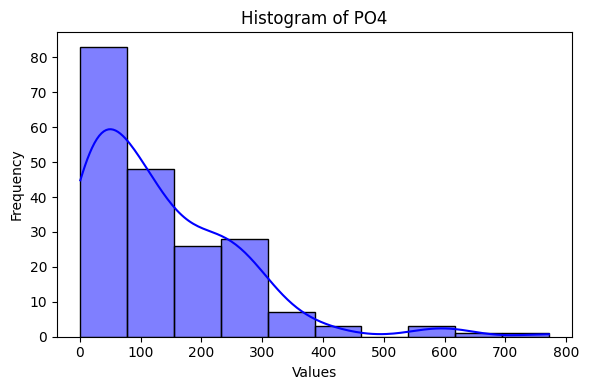

c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


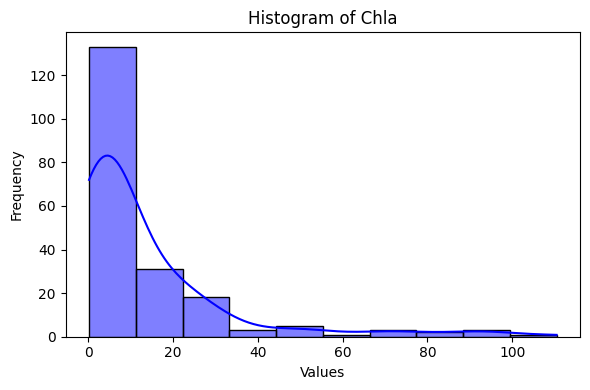

c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


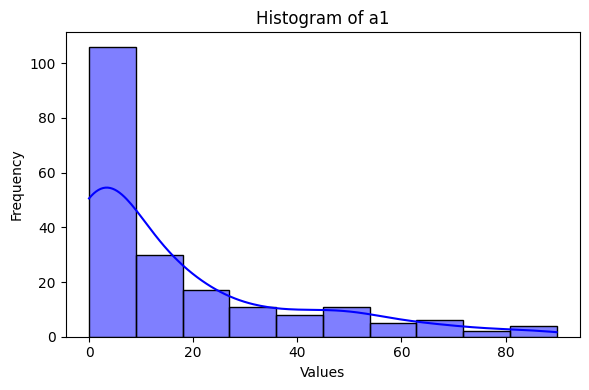

c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


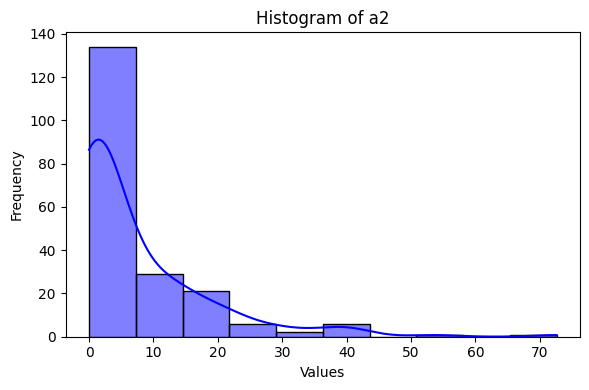

c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


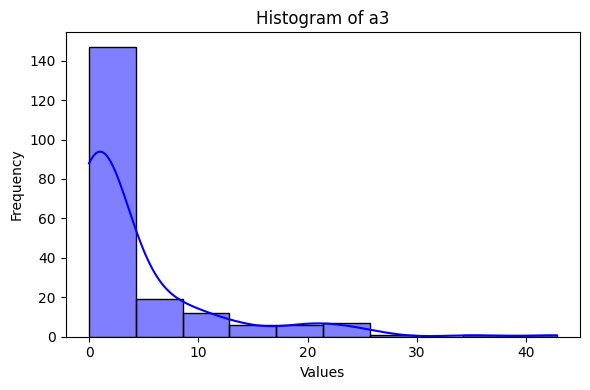

c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


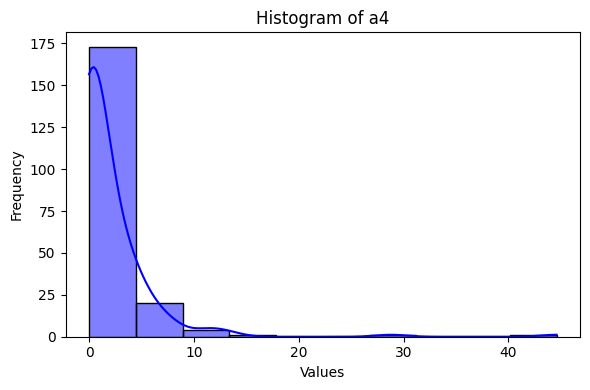

c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


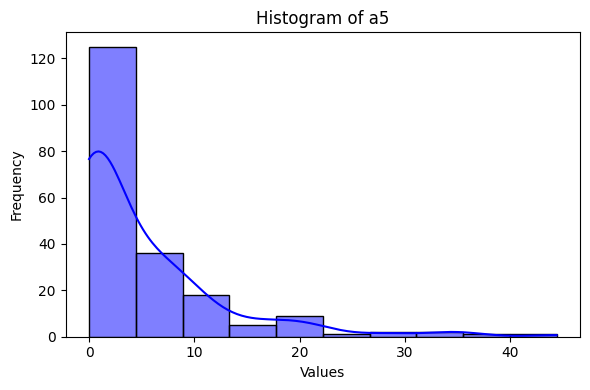

c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


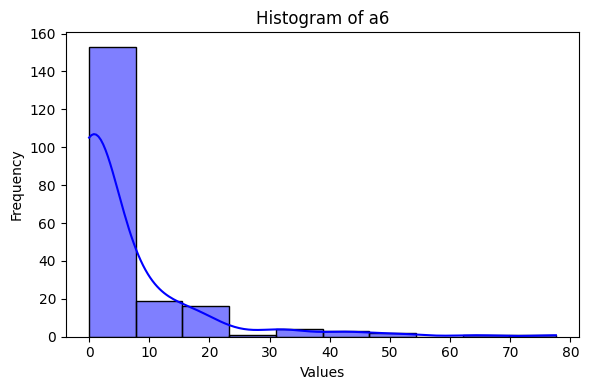

c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


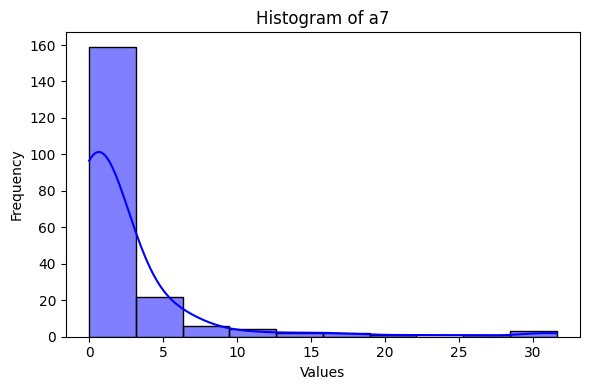

In [10]:
#plotting features (histograms)
for feature in algae_a1.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(algae_a1[feature], color='blue', bins=10, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [11]:
algae_a1

,season,size,speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
0,3,2,2,8.00,9.8,60.800000,6.238000,578.000000,105.000000,170.000000,50.000000,0.0,0.0,0.0,0.0,34.2,8.3,0.0
1,1,2,2,8.35,8.0,57.750000,1.288000,370.000000,428.750000,558.750000,1.300000,1.4,7.6,4.8,1.9,6.7,0.0,2.1
2,0,2,2,8.10,11.4,40.020000,5.330000,346.666990,125.667000,187.057010,15.600000,3.3,53.6,1.9,0.0,0.0,0.0,9.7
3,1,2,2,8.07,4.8,77.364000,2.302000,98.182000,61.182000,138.700000,1.400000,3.1,41.0,18.9,0.0,1.4,0.0,1.4
4,0,2,2,8.06,9.0,55.350000,10.416000,233.700000,58.222000,97.580000,10.500000,9.2,2.9,7.5,0.0,7.5,4.1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,2,8.40,8.4,17.375000,3.833000,83.750000,53.625000,79.750000,2.338000,12.7,21.7,5.6,0.0,1.0,0.0,0.0
196,1,0,2,8.30,10.6,14.320000,3.200000,125.333000,35.333000,75.904000,4.667000,18.0,7.0,1.7,0.0,4.8,10.3,1.0
197,0,0,2,8.20,7.0,139.989000,2.978000,60.110000,78.333000,140.220000,31.738000,0.0,15.9,2.4,1.0,0.0,0.0,0.0
198,3,0,2,8.00,7.6,8.011734,8.011734,8.011734,8.011734,8.011734,8.011734,0.0,12.5,3.7,1.0,0.0,0.0,4.9


In [12]:
#Let's create numpy arrays for features and target
X = algae_a1.drop(['a1'], axis=1)
y = algae_a1['a1']

In [13]:
# Split the data into training and testing sets with 35% of data reserved for testing

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35,random_state=7)

In [14]:
# Initialize a standard scaler
scaler = StandardScaler()
# Scale the training data (mean=0 and variance=1)
X_scaled = scaler.fit_transform(X_train)
# Scale the test data using the mean and variance computed from the training data
X_scaled_test = scaler.transform(X_test)

In [15]:
# Define hyperparameters to be tuned for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [16]:
# Set up grid search with cross-validation for Random Forest with 3-fold CV
# The goal is to minimize the negative mean squared error
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_rf, 
                              cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
# Start the grid search
grid_search_rf.fit(X_scaled, y_train)

# Initialize the XGBoost Regressor
xgb_model = xgb.XGBRegressor()
# Train the XGBoost model on the scaled training data
xgb_model.fit(X_scaled, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [17]:
# =========================
# IMPORTING REQUIRED METRICS
# =========================
from sklearn.metrics import mean_absolute_error, r2_score

# =========================
# DATA PREPARATION (SAMPLE)
# =========================
# Sample data for illustration purposes (replace with your dataset)
# Assume 'X' contains your features and 'y' contains your target variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# =========================
# DEFINING REGRESSION MODELS
# =========================
# Define a dictionary of regression algorithms
regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': grid_search_rf.best_estimator_,
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor(),
    'XGBoost': xgb_model  # Adding the XGBoost model
}

# Dictionary to store results
results = {}

# =========================
# TRAINING AND EVALUATION LOOP
# =========================
# Loop through each regression algorithm
for name, reg in regressors.items():
    reg.fit(X_scaled, y_train)
    y_pred = reg.predict(X_scaled_test)
    
    # Calculate regression metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)

    results[name] = {
        'Mean Squared Error (MSE)': mse,
        'Root Mean Squared Error (RMSE)': rmse,
        'Mean Absolute Error (MAE)': mae,
        'R-squared (R2)': r_squared
    }

# =========================
# PRINTING RESULTS
# =========================
# Print results for each regression algorithm
for name, metrics in results.items():
    print(f"Regressor: {name}")
    print(f"Mean Squared Error (MSE): {metrics['Mean Squared Error (MSE)']:.2f}")
    print(f"Root Mean Squared Error (RMSE): {metrics['Root Mean Squared Error (RMSE)']:.2f}")
    print(f"Mean Absolute Error (MAE): {metrics['Mean Absolute Error (MAE)']:.2f}")
    print(f"R-squared (R2): {metrics['R-squared (R2)']:.2f}")
    print("=" * 40)


Regressor: Linear Regression
Mean Squared Error (MSE): 199.06
Root Mean Squared Error (RMSE): 14.11
Mean Absolute Error (MAE): 11.24
R-squared (R2): 0.50
Regressor: Decision Tree Regressor
Mean Squared Error (MSE): 297.51
Root Mean Squared Error (RMSE): 17.25
Mean Absolute Error (MAE): 11.60
R-squared (R2): 0.26
Regressor: Random Forest Regressor
Mean Squared Error (MSE): 188.42
Root Mean Squared Error (RMSE): 13.73
Mean Absolute Error (MAE): 10.00
R-squared (R2): 0.53
Regressor: Support Vector Regressor
Mean Squared Error (MSE): 353.55
Root Mean Squared Error (RMSE): 18.80
Mean Absolute Error (MAE): 11.81
R-squared (R2): 0.12
Regressor: K-Nearest Neighbors Regressor
Mean Squared Error (MSE): 212.41
Root Mean Squared Error (RMSE): 14.57
Mean Absolute Error (MAE): 10.87
R-squared (R2): 0.47
Regressor: XGBoost
Mean Squared Error (MSE): 225.50
Root Mean Squared Error (RMSE): 15.02
Mean Absolute Error (MAE): 10.36
R-squared (R2): 0.44


c:\Users\malho\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


In [18]:
# Check Feature Importance using Random Forest
importances = grid_search_rf.best_estimator_.feature_importances_
features = algae_a1.drop('a1', axis=1).columns

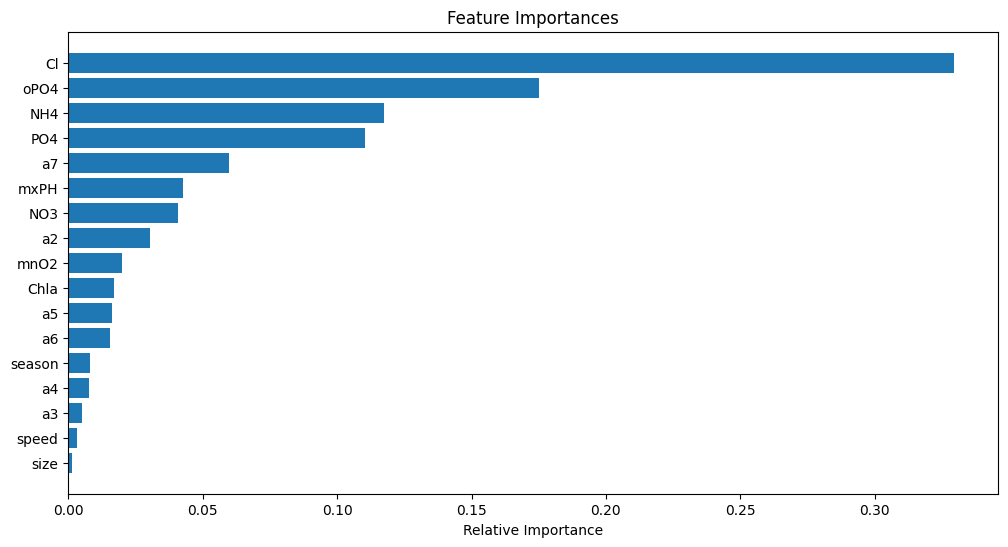

In [19]:
#Plotting features of importance
plt.figure(figsize=(12,6))
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()